### 막대 그래프

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "data/malgun.ttf"     #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel("data/시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

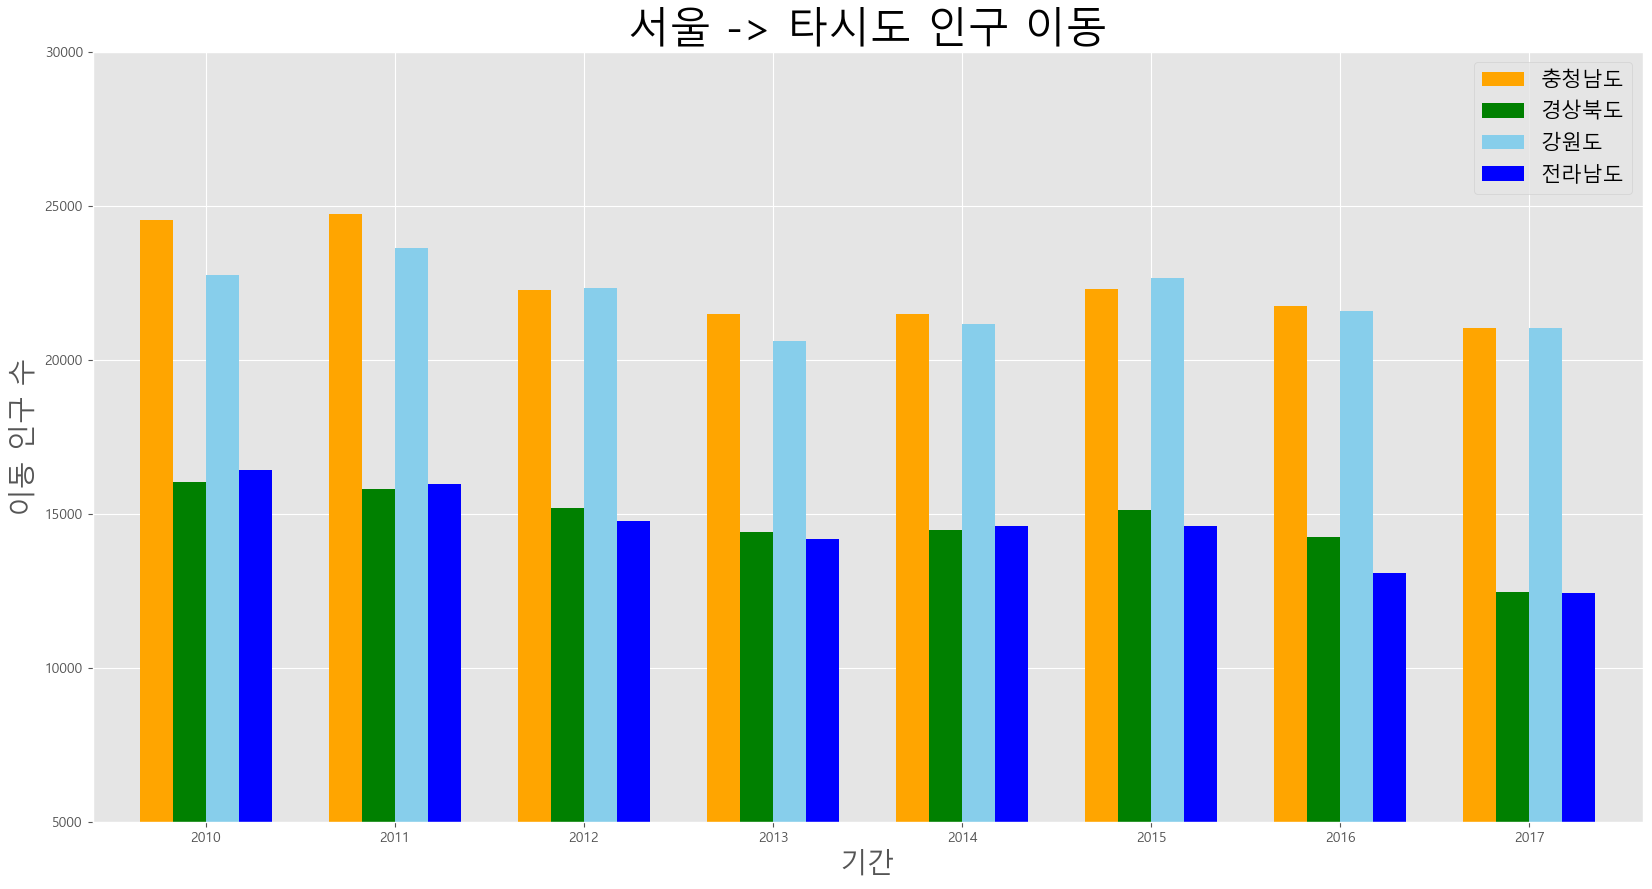

In [7]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7, color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)
plt.xticks(rotation=0)

plt.show()

가로형 막대 그래프

In [9]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [10]:
# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)
df_4['합계']

전입지
충청남도    179533.0
경상북도    117740.0
강원도     175731.0
전라남도    116035.0
Name: 합계, dtype: float64

In [11]:
# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
df_total

,합계
전입지,
전라남도,116035.0
경상북도,117740.0
강원도,175731.0
충청남도,179533.0


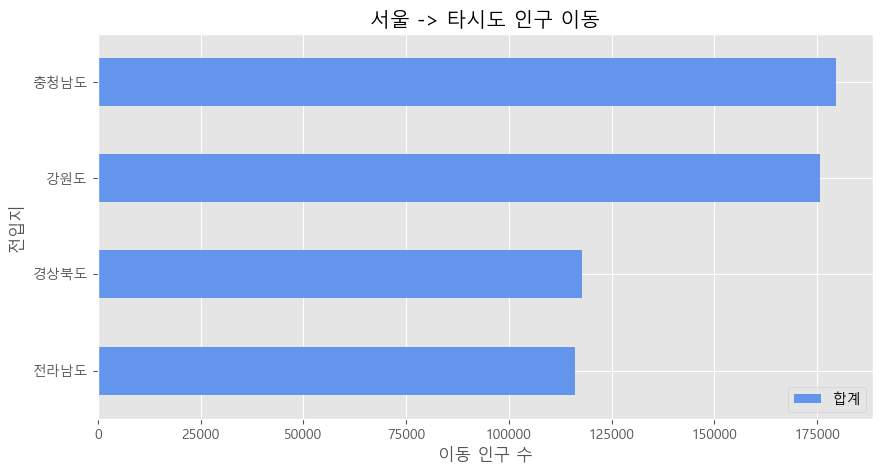

In [12]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

2축 그래프

In [13]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [14]:
plt.style.use('ggplot')                     # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False    # 마이너스 부호 출력 설정

In [22]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 
print(df)


발전 전력별   합계   수력   화력 원자력
1990    277  156  121   -
1991    263  150  113   -
1992    247  142  105   -
1993    221  133   88   -
1994    231  138   93   -
1995    230  142   88   -
1996    213  125   88   -
1997    193  107   86   -
1998    170  102   68   -
1999    186  103   83   -
2000    194  102   92   -
2001    202  106   96   -
2002    190  106   84   -
2003    196  117   79   -
2004    206  125   81   -
2005    215  131   84   -
2006    225  126   99   -
2007    236  133  103   -
2008    255  141  114   -
2009    235  125  110   -
2010    237  134  103   -
2011    211  132   79   -
2012    215  135   80   -
2013    221  139   82   -
2014    216  130   86   -
2015    190  100   90   -
2016    239  128  111   -


C:\Users\UserK\AppData\Local\Temp\ipykernel_13780\1083439497.py:2: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('data/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)


In [25]:
# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      
print(df)

발전 전력별 총발전량   수력   화력 원자력 총발전량 - 1년        증감율
1990    277  156  121   -      None        NaN
1991    263  150  113   -       277  -5.054152
1992    247  142  105   -       263   -6.08365
1993    221  133   88   -       247 -10.526316
1994    231  138   93   -       221   4.524887
1995    230  142   88   -       231    -0.4329
1996    213  125   88   -       230  -7.391304
1997    193  107   86   -       213  -9.389671
1998    170  102   68   -       193 -11.917098
1999    186  103   83   -       170   9.411765
2000    194  102   92   -       186   4.301075
2001    202  106   96   -       194   4.123711
2002    190  106   84   -       202  -5.940594
2003    196  117   79   -       190   3.157895
2004    206  125   81   -       196   5.102041
2005    215  131   84   -       206   4.368932
2006    225  126   99   -       215   4.651163
2007    236  133  103   -       225   4.888889
2008    255  141  114   -       236   8.050847
2009    235  125  110   -       255  -7.843137
2010    237  

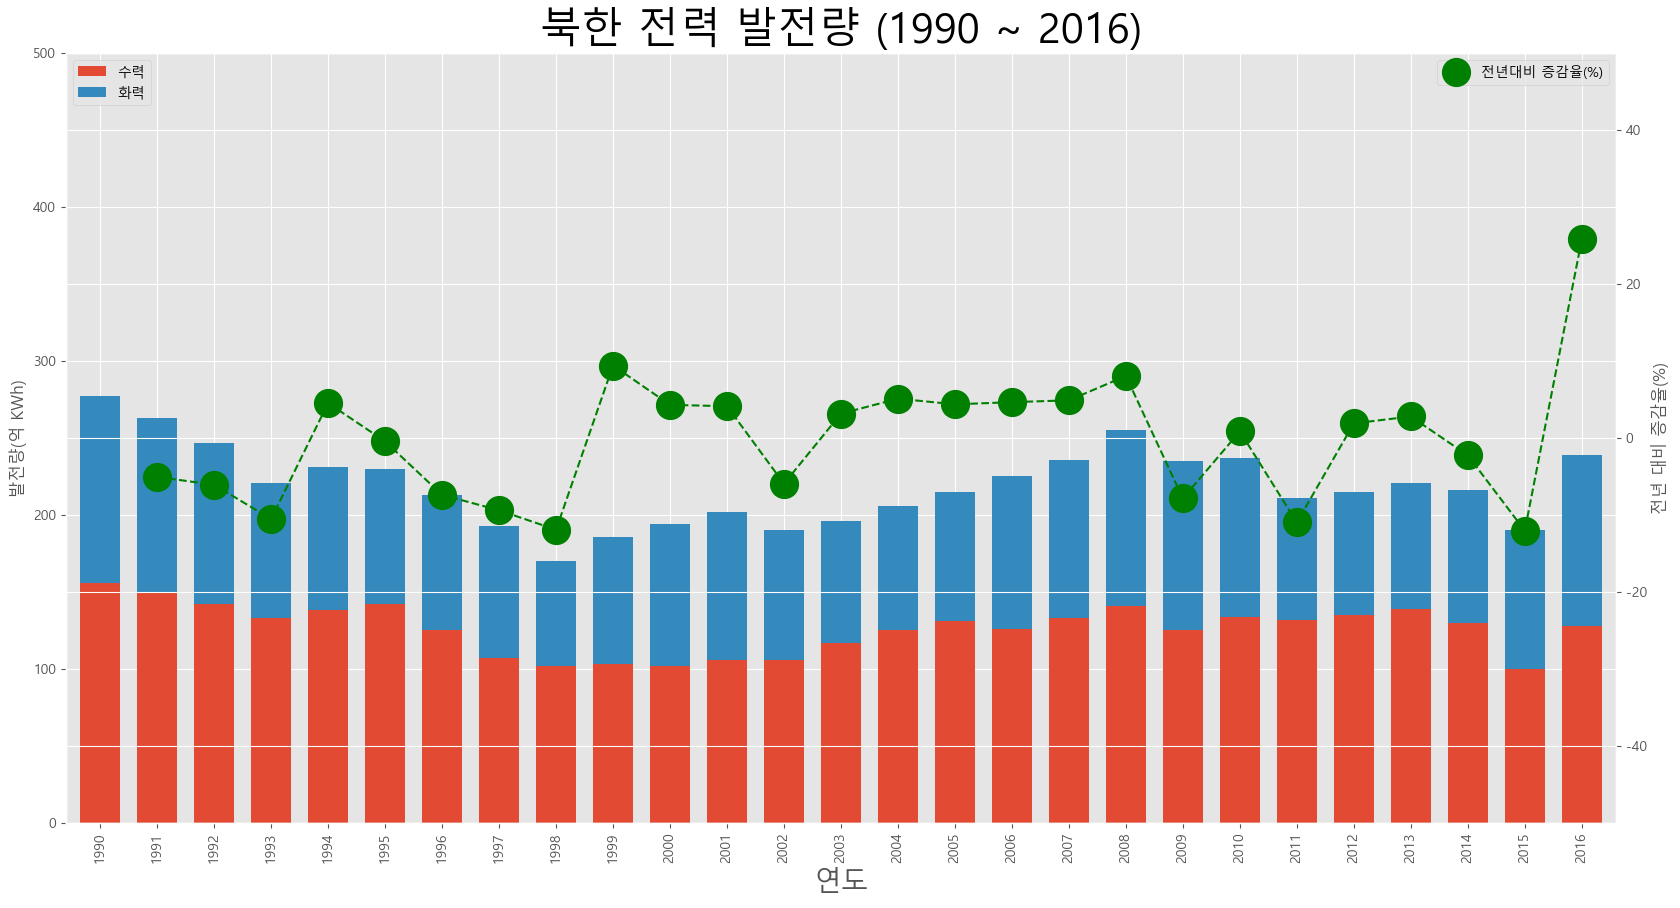

In [33]:
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')
ax2.legend(loc='best')

plt.show()